## Step 1.1: Load the Telco Customer Churn Dataset

In this step, we are:
- Import the **all** libraries we need 
- Load the **Telco Customer Churn** dataset into a pandas DataFrame.  
- This allows us to work with the data in Python.  
- We will display the first few rows to get an initial sense of the columns and values.  
- **NOTA**: Make sure the CSV file is in the same folder as this notebook so pandas can find it easily.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_churn = pd.read_csv('Telco-Customer-Churn.csv')  # Ensure the CSV is in the same folder

# Display the first 5 rows
df_churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 1.2: Explore the Dataset

In this step, we are exploring the Telco Customer Churn dataset to understand its structure:

- Check the **shape**: how many rows (customers) and columns (features) we have.
- Inspect **columns and data types** to see which are numerical or categorical.
- Identify **missing values**, if any, which will need to be handled later.
- This step gives us a better understanding of the data before preprocessing and modeling.

In [36]:
# Shape of the dataset
print(f"Dataset shape: {df_churn.shape}")

# Columns and data types
print("\nColumns and data types:")
print(df_churn.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df_churn.isnull().sum())

# Optional: quick statistical summary for numerical features
print("\nStatistical summary of numerical features:")
print(df_churn.describe())


Dataset shape: (7043, 21)

Columns and data types:
customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMo

## Dataset Overview

Now we have a clear picture of the dataset:

- **Rows / Columns:** 7,043 customers, 21 features.
- **Data types:** Most are strings (categorical), a few integers (`SeniorCitizen`, `tenure`) and one float (`MonthlyCharges`).
- **Missing values:** None, so no cleaning needed for nulls right now.
- **Numerical summary:**
  - `SeniorCitizen` is mostly 0 (not senior).
  - `tenure` ranges from 0 to 72 months.
  - `MonthlyCharges` ranges from $18.25 to $118.75.


## Step 1.3: Check the Target Distribution

In this step, we examine the target variable `Churn`:

- Count how many customers **churned** (`Yes`) versus **did not churn** (`No`).  
- Understanding the distribution helps us see if the dataset is **balanced** or **imbalanced**.  
- This is important because highly imbalanced data may affect model performance and require special handling.


Churn value counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


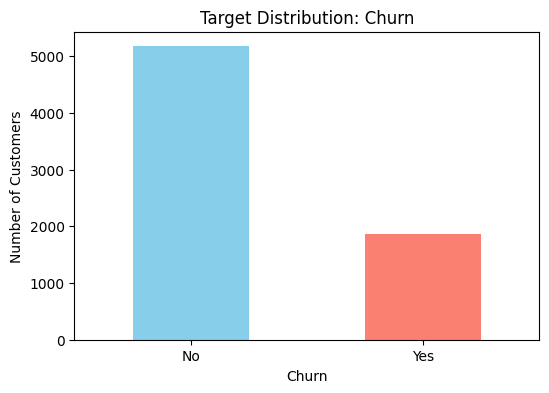

In [37]:
# Check the distribution of the target variable
target_counts = df_churn['Churn'].value_counts()
print("Churn value counts:")
print(target_counts)

# Optional: visualize the distribution


plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Distribution: Churn')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


## Target Distribution Analysis

- **No = 5,174**, **Yes = 1,869** → the dataset is **imbalanced**, because there are almost 3 times more customers who did not churn than those who did.  

- This means if we train a model without considering the imbalance, it might be biased toward predicting “No” more often.  

- **How to handle imbalance:**  
  - Use **stratified sampling** when splitting data into train/test sets.  
  - Apply **class weighting** in the model so misclassifying the minority class is penalized more.  
  - Use **oversampling** (duplicate minority class) or **undersampling** (reduce majority class) techniques.  
  - Use specialized algorithms designed for imbalanced data (e.g., SMOTE or balanced Random Forests).  

> We don’t need to apply these yet, but it’s important to be aware of them for later steps.


## Step 1.4: Visualize Key Features

In this step, we visualize how some important features relate to customer churn.  

- **Numerical features:** `tenure`, `MonthlyCharges`, `TotalCharges`  
  - We can use histograms to see the distribution for churned vs non-churned customers.  

- **Categorical features:** `Contract`, `InternetService`, `PaymentMethod`  
  - We can use bar plots to see the proportion of churn within each category.  

Visualizations help us understand which features might be important for predicting churn.


=== Numerical Feature Summary by Churn ===
Churn                          No          Yes
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5163.000000  1869.000000
               mean   2555.344141  1531.796094
               std    2329.456984  1890.822994
               mi

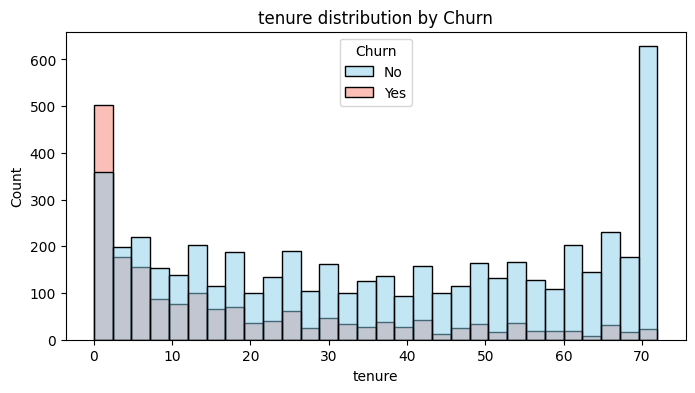

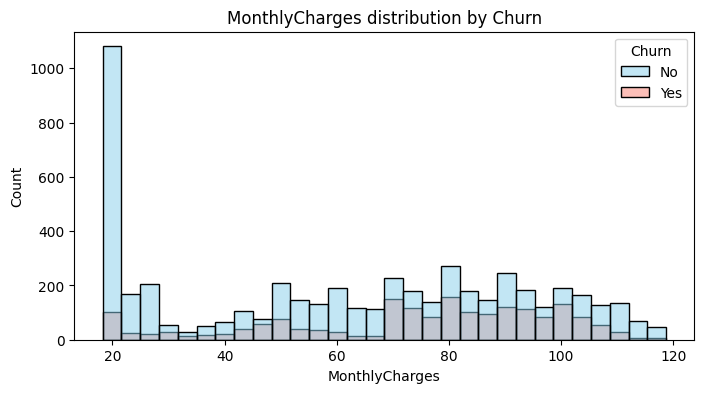

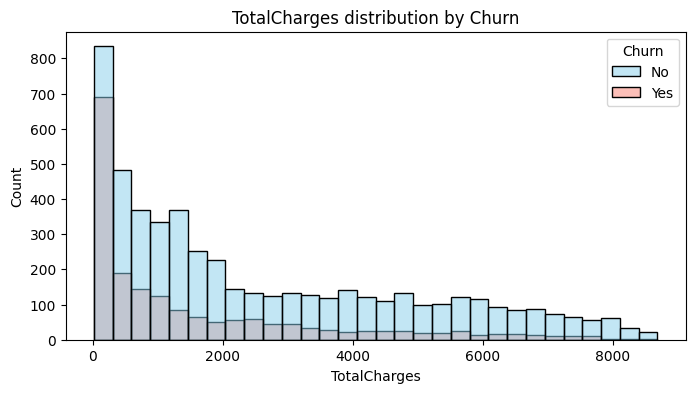


=== Categorical Feature Counts by Churn ===
                       Contract                                               \
      Bank transfer (automatic) Credit card (automatic) DSL Electronic check   
Churn                                                                          
No                          NaN                     NaN NaN              NaN   
Yes                         NaN                     NaN NaN              NaN   

                                                                     ...  \
      Fiber optic Mailed check Month-to-month  No One year Two year  ...   
Churn                                                                ...   
No            NaN          NaN         2220.0 NaN   1307.0   1647.0  ...   
Yes           NaN          NaN         1655.0 NaN    166.0     48.0  ...   

                  PaymentMethod                                               \
      Bank transfer (automatic) Credit card (automatic) DSL Electronic check   
Churn        

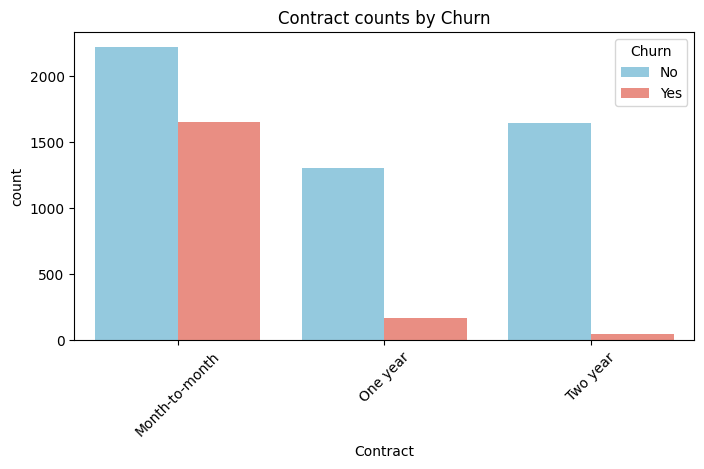

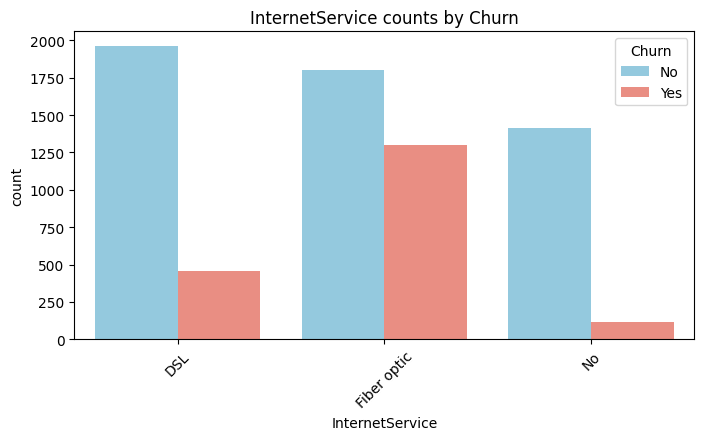

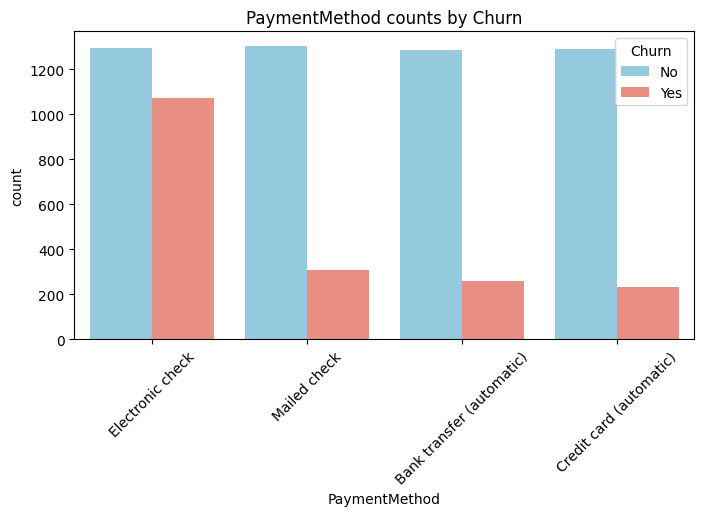

In [38]:


# Convert TotalCharges to numeric (handle empty strings)
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

# --- Numerical feature summary ---
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("=== Numerical Feature Summary by Churn ===")
num_summary = df_churn.groupby('Churn')[num_features].describe().T
print(num_summary)

# Plot numerical features
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_churn, x=feature, hue='Churn', bins=30, kde=False, palette=['skyblue','salmon'])
    plt.title(f'{feature} distribution by Churn')
    plt.show()

# --- Categorical feature summary ---
cat_features = ['Contract', 'InternetService', 'PaymentMethod']

print("\n=== Categorical Feature Counts by Churn ===")
cat_summary = df_churn.groupby('Churn')[cat_features].apply(lambda x: x.apply(lambda y: y.value_counts())).unstack(level=1)
print(cat_summary)

# Plot categorical features
for feature in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_churn, x=feature, hue='Churn', palette=['skyblue','salmon'])
    plt.title(f'{feature} counts by Churn')
    plt.xticks(rotation=45)
    plt.show()


# Data Exploration (so far) – Customer Churn Dataset

## 1. Dataset Overview
- **Rows / Columns:** 7,043 customers, 21 features.
- **Data types:** Mostly strings (categorical), a few integers (`SeniorCitizen`, `tenure`) and one float (`MonthlyCharges`).
- **Missing values:** None, so no cleaning needed for nulls right now.

---

## 2. Target Distribution
- `Churn = No`: 5,174 customers  
- `Churn = Yes`: 1,869 customers  
- **Observation:** The dataset is **imbalanced**; there are almost 3 times more non-churned than churned customers.  
- **Implication:** If we train a model without accounting for imbalance, it might be biased toward predicting “No” more often.  
- **Mitigation:** Later we can consider methods like class weighting, resampling (over/under-sampling), or evaluation metrics that account for imbalance.

---

## 3. Numerical Features Analysis

| Feature          | Churn=No (mean / median) | Churn=Yes (mean / median) | Insight |
|-----------------|-------------------------|--------------------------|---------|
| `tenure`         | 37.6 / 38              | 18.0 / 10                | Churned customers are generally **newer**. Long-tenured customers are less likely to leave. |
| `MonthlyCharges` | 61.3 / 64.4            | 74.4 / 79.7              | Churned customers pay **more per month** → price sensitivity may influence churn. |
| `TotalCharges`   | 2,555 / 1,684          | 1,532 / 704              | Reflects tenure; churned customers spent less overall. |

**Takeaway:** `tenure`, `MonthlyCharges`, and `TotalCharges` are strong predictors of churn.

---

## 4. Categorical Features Analysis

| Feature           | Observation                                                                 |
|------------------|----------------------------------------------------------------------------|
| `Contract`        | Month-to-month customers churn **far more** than 1-year or 2-year contracts. |
| `PaymentMethod`   | Customers using **electronic check** have higher churn than other methods. |
| `InternetService` | Fiber optic users tend to churn more than DSL or no internet.              |

**Takeaway:** Contract type and payment method are highly correlated with churn. These features should be **encoded** for the model.

---

## 5. Overall Insights
1. Churn is higher among **new, high-paying customers**.  
2. Month-to-month contracts and electronic check payment methods are **risk factors** for churn.  
3. Dataset is **imbalanced**, so model evaluation should consider metrics like **precision, recall, F1-score**, not just accuracy.  
4. Features identified above will be key for preprocessing and model building in the next steps.


# Step 2: Data Preprocessing – Customer Churn Dataset

Before training a machine learning model, we need to **prepare the dataset**.  

### Why Preprocessing is Important
1. **Convert data types**: Some columns that look numeric may actually be stored as strings, which will break calculations and modeling.  
2. **Handle missing values**: Even a few missing entries can cause errors in model training. Checking for missing values ensures we can handle them properly.  
3. **Encode categorical variables**: Machine learning models only work with numeric input, so we need to convert string categories to numbers.  
4. **Separate features and target**: We need a clean feature matrix (`X`) and target vector (`y`) for training.

### Column Preprocessing Plan

| Column          | Type in CSV | Preprocessing Needed                   | Why? |
|-----------------|------------|---------------------------------------|------|
| `TotalCharges`  | str        | Convert to numeric, fill missing      | Stored as string, has some blanks → convert to numeric for modeling |
| `tenure`        | int64      | None                                  | Already numeric |
| `MonthlyCharges`| float64    | None                                  | Already numeric |
| `SeniorCitizen` | int64      | None                                  | Already numeric |
| All categorical | str        | Encode (binary 0/1 or one-hot)       | ML models require numeric input |
| Target `Churn`  | str        | Convert to binary 0/1                 | ML models require numeric output |

> **Note:** Checking for missing data is important because it helps us know if any rows will cause errors during modeling. Even a single missing value can break algorithms like KNN or logistic regression.


In [39]:
# Step 2: Data Preprocessing
print("\n" + "="*50)
print("STEP 2: DATA PREPROCESSING")
print("="*50)

# 1) Check for missing values
print("\nStep 2.1: Checking for missing values in each column...")
missing_values = df_churn.isnull().sum()
print(missing_values)

# 2) Convert TotalCharges to numeric
print("\nStep 2.2: Converting 'TotalCharges' to numeric...")
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
missing_after_conversion = df_churn['TotalCharges'].isnull().sum()
print(f"Missing values in 'TotalCharges' after conversion: {missing_after_conversion}")

# 3) Drop rows with missing TotalCharges
if missing_after_conversion > 0:
    print("\nStep 2.3: Dropping rows with missing 'TotalCharges'...")
    df_churn = df_churn.dropna(subset=['TotalCharges'])
    print(f"Remaining missing values in 'TotalCharges': {df_churn['TotalCharges'].isnull().sum()}")
    print(f"New dataset shape after dropping rows: {df_churn.shape}")

# 4) Convert target column 'Churn' to binary
print("\nStep 2.4: Converting target column 'Churn' to binary (No=0, Yes=1)...")
df_churn['Churn'] = df_churn['Churn'].map({'No':0, 'Yes':1})
print("Target conversion complete.")
print(f"Target value counts:\n{df_churn['Churn'].value_counts()}")

# 5) Convert binary categorical columns to 0/1
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
print("\nStep 2.5: Converting binary categorical columns to numeric 0/1:")
for col in binary_cols:
    df_churn[col] = df_churn[col].map({'No':0, 'Yes':1})
    print(f"{col}: converted")

# 6) One-hot encode remaining categorical columns
categorical_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaymentMethod']

print("\nStep 2.6: One-hot encoding multi-class categorical columns...")
df_churn = pd.get_dummies(df_churn, columns=categorical_cols, drop_first=True)
print(f"New dataset shape after encoding: {df_churn.shape}")

# 7) Separate features and target
print("\nStep 2.7: Separating features (X) and target (y)...")
X = df_churn.drop(['customerID', 'Churn'], axis=1)
y = df_churn['Churn']
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")




STEP 2: DATA PREPROCESSING

Step 2.1: Checking for missing values in each column...
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Step 2.2: Converting 'TotalCharges' to numeric...
Missing values in 'TotalCharges' after conversion: 11

Step 2.3: Dropping rows with missing 'TotalCharges'...
Remaining missing values in 'TotalCharges': 0
New dataset shape after dropping rows: (7032, 21)

Step 2.4: Converting target column 'Churn' to binary (No=0, Yes=1)...
Target conversion complete.
Target value counts:
Churn
0    5163
1    1869
Name: count, dty

## Data Preprocessing Summary

Before training a model, we need to prepare the data so it’s clean and numeric. Here’s what we did:

1. **Check for missing values**  
   - Most columns have no missing data.  
   - `TotalCharges` had 11 missing entries, which we handled by **dropping the rows**.

2. **Convert `TotalCharges` to numeric**  
   - Originally stored as strings.  
   - After conversion, the missing values were clearly identified as `NaN`.

3. **Drop rows with missing `TotalCharges`**  
   - Removed 11 rows with missing values.  
   - New dataset shape: 7,032 rows × 21 columns.

4. **Convert target `Churn` to binary**  
   - `No → 0` and `Yes → 1`.  
   - Required for classification algorithms.

5. **Convert binary categorical columns to numeric**  
   - Columns like `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling` are converted to 0/1.

6. **One-hot encode multi-class categorical columns**  
   - Columns with more than 2 categories (e.g., `Contract`, `InternetService`, `PaymentMethod`) are converted into multiple binary columns.  
   - Dataset shape increased due to this encoding.

7. **Separate features (X) and target (y)**  
   - Features (`X`) contain 30 columns ready for modeling.  
   - Target (`y`) contains the binary churn labels.

**Takeaways:**  
- The dataset is now numeric and clean.  
- We handled the few missing values appropriately by dropping them.  
- All categorical features are converted, and the data is ready for model training.


## Step 3: Split the Data

Before training our model, we need to split the dataset into **training** and **testing** sets.

- **Training set (80%)**: Used to train the model.
- **Test set (20%)**: Used to evaluate model performance on unseen data.
- **Stratify by target**: Ensures the proportion of churned vs. non-churned customers is the same in both sets.
- **Random state = 42**: Ensures reproducibility of the split, so results are consistent every time we run the notebook.

This step is crucial to prevent **data leakage** and get a realistic measure of model performance.


We will split our dataset into **training** (80%) and **testing** (20%) sets. This allows us to train the model on one subset and evaluate its performance on unseen data.  

**Important consideration:** Our dataset is **imbalanced**:

Churn value counts:
**No** 5174
**Yes** 1869

This means there are almost 3 times more customers who did not churn than those who did. If we split the data without care, the test set might have very few churned customers, which would give misleading evaluation metrics.  

To handle this, we use **stratified splitting** with `stratify=y` in `train_test_split`. Stratifying ensures that the proportion of churned vs. not churned customers is roughly the same in both the training and test sets.  

We also set `random_state=42` for reproducibility, so that every time we run the notebook, the split is the same.  

Later, when training the model, we may also consider additional techniques to handle imbalance, such as:  

- Using **class weights** in the model to give more importance to the minority class.  
- **Resampling**: oversampling the minority class or undersampling the majority class.  
- Synthetic sampling methods like **SMOTE**.  

For now, stratifying during the split is sufficient to maintain representative distributions.


In [40]:
# Step 3: Split the Data
from sklearn.model_selection import train_test_split

print("="*50)
print("STEP 3: SPLIT THE DATA")
print("="*50)

# Separate features and target (already done in Step 2)
# X = df_churn.drop('Churn', axis=1)
# y = df_churn['Churn']

# Split into training (80%) and testing (20%) sets
# Use stratify=y to maintain the class distribution
# Set random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

# Print sizes
total_samples = X.shape[0]
print(f"Total number of samples: {total_samples}")
print(f"Training set size: {X_train.shape[0]} samples (80%)")
print(f"Test set size: {X_test.shape[0]} samples (20%)")
print(f"Training features: {X_train.shape[1]}")
print(f"Test features: {X_test.shape[1]}")

# Verify class distribution in both sets
print("\nTraining set target distribution:")
print(y_train.value_counts())
print(f"  No churn (0): {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"  Churn (1): {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

print("\nTest set target distribution:")
print(y_test.value_counts())
print(f"  No churn (0): {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"  Churn (1): {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")


STEP 3: SPLIT THE DATA
Total number of samples: 7032
Training set size: 5625 samples (80%)
Test set size: 1407 samples (20%)
Training features: 30
Test features: 30

Training set target distribution:
Churn
0    4130
1    1495
Name: count, dtype: int64
  No churn (0): 4130 (73.4%)
  Churn (1): 1495 (26.6%)

Test set target distribution:
Churn
0    1033
1     374
Name: count, dtype: int64
  No churn (0): 1033 (73.4%)
  Churn (1): 374 (26.6%)


### Step 4: Train a KNN Model

In this step, we will create a **K-Nearest Neighbors (KNN)** classifier to predict customer churn.  

**What we are doing:**
- KNN works by looking at the `k` nearest neighbors of a sample in the feature space and assigning the class that is most common among them.
- We start with `n_neighbors=5` as a first guess.
- Train the model using the **training set** (`X_train`, `y_train`).

**Notes:**
- Later, we can experiment with different `k` values to see how it affects performance.
- The model will automatically handle the numerical features, and categorical features were already encoded in Step 2.


In [41]:
# Step 4: Train a KNN Model
from sklearn.neighbors import KNeighborsClassifier

print("\n" + "="*50)
print("STEP 4: TRAINING KNN MODEL")
print("="*50)

# Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

print("KNN classifier trained successfully!")
print(f"Number of neighbors (k): {knn.n_neighbors}")

# Make predictions on train and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(f"\nTraining predictions: {len(y_train_pred)} samples")
print(f"Test predictions: {len(y_test_pred)} samples")



STEP 4: TRAINING KNN MODEL
KNN classifier trained successfully!
Number of neighbors (k): 5

Training predictions: 5625 samples
Test predictions: 1407 samples


### Step 5: Make Predictions and Evaluate the KNN Model

In this step, we use the trained KNN model to make predictions on the test set. After predicting, we calculate key evaluation metrics:

- **Accuracy:** Overall percentage of correct predictions.
- **Precision:** Of all predicted churns, how many were correct.
- **Recall:** Of all actual churns, how many did we correctly predict.

We also create a **confusion matrix** to visualize true vs. predicted classes and a **classification report** to summarize metrics for each class.

> Note: Since the dataset is imbalanced (more "No" than "Yes"), precision and recall are especially important to understand how well the model predicts churned customers.


In [42]:
# Step 5: Make Predictions and Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

print("\n" + "="*50)
print("STEP 5: EVALUATING KNN MODEL")
print("="*50)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Precision and Recall for test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Confusion matrix
test_confusion = confusion_matrix(y_test, y_test_pred)

print("=== Model Performance ===")
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\nTest Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

print("\n=== Confusion Matrix ===")
print("                Predicted")
print("              No    Yes")
print(f"Actual No      {test_confusion[0,0]:4d}   {test_confusion[0,1]:4d}")
print(f"Actual Yes     {test_confusion[1,0]:4d}   {test_confusion[1,1]:4d}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))



STEP 5: EVALUATING KNN MODEL
=== Model Performance ===

Training Accuracy: 0.8325 (83.25%)
Test Accuracy: 0.7463 (74.63%)

Test Precision: 0.5281
Test Recall: 0.4278

=== Confusion Matrix ===
                Predicted
              No    Yes
Actual No       890    143
Actual Yes      214    160

=== Classification Report ===
              precision    recall  f1-score   support

          No       0.81      0.86      0.83      1033
         Yes       0.53      0.43      0.47       374

    accuracy                           0.75      1407
   macro avg       0.67      0.64      0.65      1407
weighted avg       0.73      0.75      0.74      1407



## Step 5: KNN Model Evaluation Summary

After training the initial KNN model with `n_neighbors=5`, we evaluated its performance on the training and test sets. Here's a detailed summary:

### Model Performance
- **Training Accuracy:** 83.25%  
- **Test Accuracy:** 74.63%

- **Test Precision (Yes / churn):** 0.5281  
- **Test Recall (Yes / churn):** 0.4278  

### Confusion Matrix

|               | Predicted No | Predicted Yes |
|---------------|-------------|---------------|
| Actual No     | 890         | 143           |
| Actual Yes    | 214         | 160           |

### Classification Report

| Class              | Precision | Recall | F1-score | Support |
|--------------------|-----------|--------|----------|---------|
| No                 | 0.81      | 0.86   | 0.83     | 1033    |
| Yes                | 0.53      | 0.43   | 0.47     | 374     |
| **Accuracy**       |           |        | 0.75     | 1407    |
| **Macro Avg**      | 0.67      | 0.64   | 0.65     | 1407    |
| **Weighted Avg**   | 0.73      | 0.75   | 0.74     | 1407    |

### Interpretation
- The model performs reasonably well for predicting customers who **did not churn** (`No`), with high precision and recall.  
- However, it struggles to predict customers who **churned** (`Yes`), with lower precision (0.53) and recall (0.43).  
- **Imbalanced dataset impact:** There are significantly more non-churners than churners, which biases the model toward predicting "No".  
- **Business insight:** Recall for churners is crucial because we want to catch as many potential churners as possible, even if it means some false positives.

**Takeaways:**  
- Initial KNN model is a decent baseline but underperforms in detecting churners.  
- Next steps should focus on experimenting with different `K` values to improve recall for churned customers, balancing business priorities between catching churners and avoiding false alerts.


### Step 6: Experiment and Improve

In this step, we will test multiple values of **K** to see how they affect our KNN model’s performance.  

- **Why we do this:**  
  Different K values can drastically change how well the model predicts churn, especially because the dataset is **imbalanced** (many more "No" than "Yes").  

- **What to measure:**  
  For each K, we will check:  
  - **Accuracy**: Overall correctness  
  - **Precision**: Of all predicted churners, how many are actually churners  
  - **Recall**: Of all actual churners, how many did we correctly identify  

- **Goal:**  
  Find a K that balances predicting churners well (high recall) without losing too much overall accuracy. Odd values of K (1, 3, 5, …) are usually chosen to avoid ties in voting.



STEP 6: EXPERIMENTING WITH DIFFERENT K VALUES
K= 1: Accuracy=0.7093, Precision=0.4545, Recall=0.4679
K= 3: Accuracy=0.7392, Precision=0.5108, Recall=0.4439
K= 5: Accuracy=0.7463, Precision=0.5281, Recall=0.4278
K= 7: Accuracy=0.7662, Precision=0.5768, Recall=0.4519
K= 9: Accuracy=0.7626, Precision=0.5763, Recall=0.4037
K=11: Accuracy=0.7697, Precision=0.6000, Recall=0.4011
K=15: Accuracy=0.7669, Precision=0.5991, Recall=0.3717
K=17: Accuracy=0.7690, Precision=0.6025, Recall=0.3850
K=19: Accuracy=0.7726, Precision=0.6116, Recall=0.3957
K=21: Accuracy=0.7740, Precision=0.6167, Recall=0.3957
K=23: Accuracy=0.7740, Precision=0.6197, Recall=0.3877
K=25: Accuracy=0.7740, Precision=0.6186, Recall=0.3904
K=27: Accuracy=0.7740, Precision=0.6207, Recall=0.3850
K=29: Accuracy=0.7740, Precision=0.6250, Recall=0.3743
K=31: Accuracy=0.7747, Precision=0.6301, Recall=0.3690
K=33: Accuracy=0.7711, Precision=0.6193, Recall=0.3610


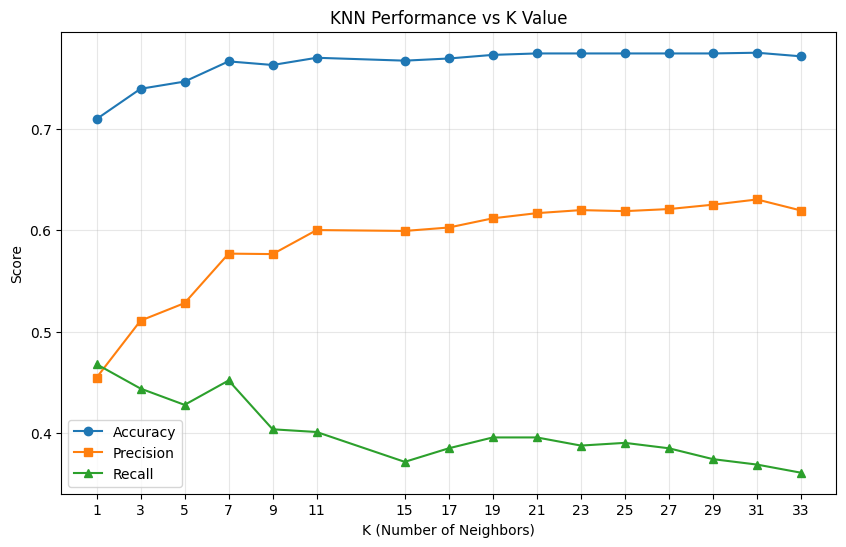


Best K based on test Accuracy:  31
Best K based on test Precision: 31
Best K based on test Recall:    1

=== Performance Table ===
 K  Accuracy  Precision   Recall
 1  0.709311   0.454545 0.467914
 3  0.739161   0.510769 0.443850
 5  0.746269   0.528053 0.427807
 7  0.766169   0.576792 0.451872
 9  0.762615   0.576336 0.403743
11  0.769723   0.600000 0.401070
15  0.766880   0.599138 0.371658
17  0.769012   0.602510 0.385027
19  0.772566   0.611570 0.395722
21  0.773987   0.616667 0.395722
23  0.773987   0.619658 0.387701
25  0.773987   0.618644 0.390374
27  0.773987   0.620690 0.385027
29  0.773987   0.625000 0.374332
31  0.774698   0.630137 0.368984
33  0.771144   0.619266 0.360963


In [44]:
# Step 6: Experiment with different K values and visualize performance
print("\n" + "="*50)
print("STEP 6: EXPERIMENTING WITH DIFFERENT K VALUES")
print("="*50)

from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# List of K values to try
k_values = [1, 3, 5, 7, 9, 11, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]
results = []

for k in k_values:
    # Create and train KNN
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    
    # Predict on test set
    y_test_pred_temp = knn_temp.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_test_pred_temp)
    prec = precision_score(y_test, y_test_pred_temp)
    rec = recall_score(y_test, y_test_pred_temp)
    
    results.append({'K': k, 'Accuracy': acc, 'Precision': prec, 'Recall': rec})
    
    print(f"K={k:2d}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Plot Accuracy, Precision, and Recall vs K
plt.figure(figsize=(10,6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['K'], results_df['Precision'], marker='s', label='Precision')
plt.plot(results_df['K'], results_df['Recall'], marker='^', label='Recall')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Score')
plt.title('KNN Performance vs K Value')
plt.xticks(k_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Identify the best K based on highest test accuracy, precision, and recall
best_k_acc = results_df.loc[results_df['Accuracy'].idxmax(), 'K']
best_k_prec = results_df.loc[results_df['Precision'].idxmax(), 'K']
best_k_rec = results_df.loc[results_df['Recall'].idxmax(), 'K']

print(f"\nBest K based on test Accuracy:  {best_k_acc}")
print(f"Best K based on test Precision: {best_k_prec}")
print(f"Best K based on test Recall:    {best_k_rec}")

# Display a table with the results
print("\n=== Performance Table ===")
print(results_df.to_string(index=False))


## Experimenting with Different K Values – Evaluation Summary

We trained KNN models with multiple `K` values (1, 3, 5, …, 33) and evaluated their performance in terms of **accuracy, precision, and recall**.

### Best K Values Observed
- **Best Accuracy:** K = 31 → 77.47%  
- **Best Precision:** K = 31 → 0.6301  
- **Best Recall:** K = 1 → 0.4679  

### Performance Insights
- **Accuracy:** Generally improves as `K` increases, but higher K reduces sensitivity to churners.  
- **Precision:** Higher K reduces false churn alerts (fewer false positives).  
- **Recall:** Lower K captures more churners (fewer false negatives), which is crucial if the business wants to proactively retain customers.

### Churn Prediction Considerations
- **Recall is often prioritized**: Catching as many potential churners as possible helps the company take action to retain them.  
- **Precision is important**: Avoiding false churn alerts reduces unnecessary retention costs and customer confusion.  
- **Balance depends on business needs**:  
  - If minimizing missed churners is the priority → choose a **lower K** (higher recall, e.g., K=1).  
  - If minimizing false churn alerts is more important → choose a **higher K** (higher precision, e.g., K=31).  
  - If overall balanced performance is desired → consider **mid-range K values** that reasonably trade-off precision and recall.

**Takeaways:**  
- Selecting K is a business-driven decision, not just a mathematical one.  
- For this dataset, **K=1** maximizes recall (catching churners) and **K=31** maximizes precision (avoiding false alarms).  
- A compromise K can be chosen based on the company’s priorities for churn management.
